#**FUNCTIONAL PROGRAMMING IN PYTHON**

## **1.BASICS**

Functional programming is a programming style that avoids side effects by performing computation with the evaluation of functions and relying heavily on immutable data structures. By using this programming style, you can reduce the liklehood of bugs and make sure that your programs are easier to maintain.

In [ ]:
import collections
Scientist = collections.namedtuple("Scientist",["name","field","born","nobel"])

In [ ]:
Sc1 = Scientist(name ="ada loveless",field = 'maths',born = '1815',nobel = 'no')

In [ ]:
Sc1.name

'ada loveless'

In [ ]:
# we created an object of type namedtuple and this are immutable type
# we cant do Sc1.name = 'Eve loveless'

In [ ]:
scientists = [Scientist(name ="ada loveless",field = 'maths',born = '1815',nobel = 'no'),Scientist(name ="Even handler",field = 'physics',born = '1925',nobel = 'no')]

In [ ]:
from pprint import pprint
pprint(scientists)

[Scientist(name='ada loveless', field='maths', born='1815', nobel='no'),
 Scientist(name='Even handler', field='physics', born='1925', nobel='no')]


In [ ]:
scientists[0].name = "Eve loveless"
# we still cant do this as the element type of list is namedtuple

AttributeError: ignored

In [ ]:
# but we can still delete an item from the list 'scientists' as lists are immutable so that is a problem
del scientists[0]

In [ ]:
scientists

In [ ]:
# so what we do is instead of a list, we use tuple

scientists = (
              Scientist(name ="ada loveless",field = 'maths',born = '1815',nobel = 'no'),
              Scientist(name ="Even handler",field = 'physics',born = '1925',nobel = 'no'),
              Scientist(name ="Steve balm",field = 'biology',born = '1936',nobel = 'yes'),
              Scientist(name ="Jack Ryan",field = 'maths',born = '1878',nobel = 'yes'),
              Scientist(name ="Marie Curie",field = 'physics',born = '1920',nobel = 'yes')

)

In [ ]:
pprint(scientists)

***So this makes the foundation of starting with functional programming. We want to start with a solid data structure that is immutable preferably.***

## **2.FILTER FUNCTION**

In [ ]:
x = filter(lambda x: x.nobel == "yes",scientists)
# returns a filter object which is an iterable  

In [ ]:
for i in x:
  print(i)

In [ ]:
tuple(filter(lambda x: x.nobel == "yes",scientists))

()

In [ ]:
tuple(filter(lambda x: x.field == "physics",scientists))

(Scientist(name='Even handler', field='physics', born='1925', nobel='no'),)

In [ ]:
tuple(filter(lambda x: x.field == "physics" and x.nobel == "yes",scientists))

()

In [ ]:
# another way of doing the same thing. We write a named function instead of lambda function

def filter_noble(x):
  return x.nobel == "yes"

tuple(filter(filter_noble,scientists))

()

So the question why do we select elements this way? We can easily iterate over the list or tuple and apply if conditions to filter out the desired result.

The reasons to use this are:
1. We can chain these functions. for ex - pprint(tuple(filter(-----))) and apply the transformation in a purely functional way, i.e we can get the desired results by just using a bunch of functions.

Now we have 2 ways to achieve the same result - filter function and list comprehension.

In [ ]:
tuple([x for x in scientists if x.nobel == "yes"])

()

## **3. MAP FUNCTION**

In [ ]:
# we pass a func and an iterator and the map function applies the func on the iterable object and returns a map object

l1 = ["1","2","3","4","5"]
print(l1[0] + l1[1])  #definitely a string

l2 = list(map(int,l1))
print(l2[0] + l2[1]) # now they are integers

print(l1)
print(l2)

12
3
['1', '2', '3', '4', '5']
[1, 2, 3, 4, 5]


In [ ]:
names_ages = tuple(map(lambda x: {'name':x.name,'age':2020 - int(x.born)}, scientists))
names_ages

({'age': 205, 'name': 'ada loveless'}, {'age': 95, 'name': 'Even handler'})

In [ ]:
# same as above without using lambda
def names_ages(x):
  return {'name':x.name, "age":2020 - int(x.born)}

names_ages = tuple(map(names_ages, scientists)) 
names_ages

({'age': 205, 'name': 'ada loveless'}, {'age': 95, 'name': 'Even handler'})

here we created a new dictionary with a new attribute which wont have been possible with filter.

In [ ]:
# a more pythonic way of doing the same thing:

tuple([{"name":x.name,"age": 2020 - int(x.born)} for x in scientists])


({'age': 205, 'name': 'ada loveless'}, {'age': 95, 'name': 'Even handler'})

In [ ]:
a

NameError: ignored

## **3. REDUCE FUNCTION**

In [ ]:
from functools import reduce

# takes a funtion and iterable and reduces down the iterable to a single value by applying the function repeatedly to te items in the sequence
edit

reduce(lambda x,y:x+y, [1,2,3,4,5])
# basically takes 2 elements at a time.
# first iteration x= 1,y = 2 and does  x = x+y = 3
# second iteration x= 3,y = 3 and does  x = x+y = 6
# third iteration x= 6,y = 4 and does  x = x+y = 10
# fourth iteration x= 10,y = 5 and does  x = x+y = 15
# so basically  func(func(func(func(x1,x2),x3),x4),x5) where func = x+y

# so x variable above acts an accumulator and y variable takes on new value every time and the return value of the function is stored in accumulator

NameError: ignored

In [ ]:
# another example to find the greatest number from a list

reduce( lambda a,b: a if (a > b) else b , [47,11,42,102,13])

102

In [ ]:
# Calculating the sum of the numbers from 1 to 100:

reduce(lambda x, y: x+y, range(1,101))

5050

In [ ]:
# calculating total edge from names_ages tuple from above

total_age = reduce(lambda acc,val:acc+val['age'],names_ages,0)
total_age

300

In [ ]:
# a more pythonic way to do the same thing
sum([x['age'] for x in names_ages])

300

In [ ]:
# one place where we can use this is to group things
# lets say we want to group scientists according to their fields

def reducer(acc,val):
    acc[val.field].append(val.name)
    return acc
  
scientists_by_field = reduce(reducer,scientists, {'maths':[],'physics':[],'biology':[]})

scientists_by_field

# one backdrop of this is that we have to give a dictionary upfront whih then gets populated and if we tend to do a mistake there the entire code blows up
# so a better way to do this is to use defaultdict from collections module

{'biology': [], 'maths': ['ada loveless'], 'physics': ['Even handler']}

In [ ]:
import collections 

def reducer(acc,val):
    acc[val.field].append(val.name)
    return acc
  
scientists_by_field = reduce(reducer,scientists, collections.defaultdict(list))

dict(scientists_by_field)


{'maths': ['ada loveless'], 'physics': ['Even handler']}

## **4. ZIP FUNCTION**

In [ ]:
list1 = [1,2,3,4,5]
list2 = [1,4,9,16,25]


print(dict(zip(list1,list2)))

print(list(zip(list1,list2)))

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]


In [ ]:
# another example

location = ["Helgoland", "Kiel", 
            "Berlin-Tegel", "Konstanz", 
            "Hohenpeißenberg"]
air_pressure = [1021.2, 1019.9, 1023.7, 1023.1, 1027.7]
temperatures = [6.0, 4.3, 2.7, -1.4, -4.4]
altitude = [4, 27, 37, 443, 977]
                
for t in zip(location, air_pressure, temperatures, altitude):
    print(t)



('Helgoland', 1021.2, 6.0, 4)
('Kiel', 1019.9, 4.3, 27)
('Berlin-Tegel', 1023.7, 2.7, 37)
('Konstanz', 1023.1, -1.4, 443)
('Hohenpeißenberg', 1027.7, -4.4, 977)


In [ ]:
#Parameters with Different Lengths

colors = ["green", "red", "blue"]
cars = ["BMW", "Alfa Romeo"]

for i in zip(cars, colors):
    print(i)



('BMW', 'green')
('Alfa Romeo', 'red')


**unzipping using zip - use of * symbol**

In [ ]:


cities_and_population = [("Zurich", 415367),
                         ("Geneva", 201818),
                         ("Basel", 177654),
                         ("Lausanne", 139111),
                         ("Bern", 133883),
                         ("Winterthur", 111851)]
            


cities, populations = list(zip(*cities_and_population))
print(cities)
print(populations)

('Zurich', 'Geneva', 'Basel', 'Lausanne', 'Bern', 'Winterthur')
(415367, 201818, 177654, 139111, 133883, 111851)


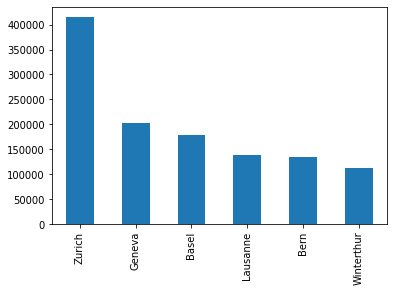

In [ ]:
# This is needed e.g., if we want to plot these data. This is just an illustrating
# example and it is not necessary to understand it completely.You have to be familiar 
# with Pandas. In the following program, we assume that only the combined list is 
# available at the beginning:

import pandas as pd

cities_and_population = [("Zurich", 415367),
                         ("Geneva", 201818),
                         ("Basel", 177654),
                         ("Lausanne", 139111),
                         ("Bern", 133883),
                         ("Winterthur", 111851)]

cities, populations = list(zip(*cities_and_population))
s = pd.Series(populations, index=cities)

s.plot(kind="bar")



## **EXERCISE**

Imagine an accounting routine used in a book shop. It works on a list with sublists, which look like this:

    Order Number    Book Title and Author           Quantity     Price per Item
    34587           Learning Python, Mark Lutz             4          40.95
    98762           Programming Python, Mark Lutz          5          56.80
    77226           Head First Python, Paul Barry          3          32.95
    88112           Einführung in Python3, Bernd Klein     3          24.99


Write a Python program, which returns a list with tuples of 2 elements. Each tuple consists of a the order number and the total price of that order. The price should be increased by 10€ if the value of the order is smaller than 100€.
Write a Python program using lambda and map.




In [ ]:
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 	3, 24.99]]

In [ ]:
min_order = 100
invoice = list(map(lambda x:x if x[1] > min_order else (x[0],x[1] + 10),map(lambda x: (x[0],x[2] * x[3]), orders)))
print(l1)





[('34587', 163.8), ('98762', 284.0), ('77226', 108.85000000000001), ('88112', 84.97)]


The same bookshop, but this time we work on a different list. The sublists of our lists look like this: 

      [ordernumber, (article number, quantity, price per unit), ... (article number, quantity, price per unit) ] 
      
Write a program which returns a list of tuples of 2 ele with (order number, total amount of order).

In [ ]:
# sublist structure: [ordernumber, (article number, quantity, price per unit), ... (article number, quantity, price per unit) ]


from functools import reduce
orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

min_order = 100
invoice_totals = list(map(lambda x: [x[0]] + list(map(lambda y: y[1]*y[2], x[1:])), orders))
invoice_totals = list(map(lambda x: [x[0]] + [reduce(lambda a,b: a + b, x[1:])], invoice_totals))
invoice_totals = list(map(lambda x: x if x[1] >= min_order else (x[0], x[1] + 10), invoice_totals))
print(invoice_totals)

[[1, 678.3299999999999], [2, 494.46000000000004], [3, 364.79999999999995], [4, 492.57]]


# **MUTLIPROCESSING WITH FP**

### **using multiprocessing module**

In [ ]:
import collections
Scientist = collections.namedtuple("Scientist",["name","field","born","nobel"])

scientists = (
              Scientist(name ="ada loveless",field = 'maths',born = '1815',nobel = 'no'),
              Scientist(name ="Even handler",field = 'physics',born = '1925',nobel = 'no'),
              Scientist(name ="Steve balm",field = 'biology',born = '1936',nobel = 'yes'),
              Scientist(name ="Jack Ryan",field = 'maths',born = '1878',nobel = 'yes'),
              Scientist(name ="Marie Curie",field = 'physics',born = '1920',nobel = 'yes')

)

In [ ]:
scientists

(Scientist(name='ada loveless', field='maths', born='1815', nobel='no'),
 Scientist(name='Even handler', field='physics', born='1925', nobel='no'),
 Scientist(name='Steve balm', field='biology', born='1936', nobel='yes'),
 Scientist(name='Jack Ryan', field='maths', born='1878', nobel='yes'),
 Scientist(name='Marie Curie', field='physics', born='1920', nobel='yes'))

In [ ]:
def transform(x):
  return{"name": x.name, 'age': 2020 - int(x.born)}

result = tuple(map(transform,scientists))
pprint(result)

({'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'})


now the above code ran very fast because we had very few no. of records but imagine having very large no. of records. This would then take a lot of time as it is processing one record at a time. lets try to simulate how it would work if we have large no, of records

In [ ]:
import time


def transform(x):
  print('processing record ' + x.name + '..................')
  time.sleep(1)
  result = {"name": x.name, 'age': 2020 - int(x.born)}
  print(f'done processing record {x.name}')
  return result

start = time.time()
result = tuple(map(transform,scientists))
end = time.time()
print(f"\ntime taken to transform records ={end - start:0.2f}\n")
pprint(result)

processing record ada loveless..................
done processing record ada loveless
processing record Even handler..................
done processing record Even handler
processing record Steve balm..................
done processing record Steve balm
processing record Jack Ryan..................
done processing record Jack Ryan
processing record Marie Curie..................
done processing record Marie Curie

time taken to transform records =5.01

({'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'})


Now the above code simulates how our code will work with large amount of data. But the catch is that above code is only using a single thread or processor at a time and the we can use multiprocessing to speed up the code using the multiprocessing module of python.

In [ ]:
import time
import os
import multiprocessing

def transform(x):
  print(f'processing process no. {os.getpid()} for record {x.name}.................')
  time.sleep(1)
  result = {"name": x.name, 'age': 2020 - int(x.born)}
  print(f'done processing process no. {os.getpid()} for record {x.name}')
  return result



pool = multiprocessing.Pool()

start = time.time()
result = pool.map(transform,scientists)
end = time.time()


print(f"\ntime taken to transform records ={end - start:0.2f}\n")
pprint(result)

processing process no. 929 for record Even handler.................
processing process no. 928 for record ada loveless.................
done processing process no. 929 for record Even handler
processing process no. 929 for record Steve balm.................
done processing process no. 928 for record ada loveless
processing process no. 928 for record Jack Ryan.................
done processing process no. 929 for record Steve balm
processing process no. 929 for record Marie Curie.................
done processing process no. 928 for record Jack Ryan
done processing process no. 929 for record Marie Curie

time taken to transform records =3.02

[{'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'}]


If you see the output of the multiprocessing code, you notice few things:
1. Time is 2 seconds less than the normal code and this difference grows as we have more and more records.
2. If we see print statements, we can notice that there are multiple records that are starting to process simaltaneously instead of a single record at a time. 

NOTE: Here the process numbers are not shown as they should be as we are not using cores of the local pc. To see the output properly run the code on a local processor.

In [ ]:
# we can even control the number of processes that are being executed at a time 
# by passing keyword argument processes to the pool function

import time
import os
import multiprocessing

def transform(x):
  print(f'processing process no. {os.getpid()} for record {x.name}.................')
  time.sleep(1)
  result = {"name": x.name, 'age': 2020 - int(x.born)}
  print(f'done processing process no. {os.getpid()} for record {x.name}')
  return result



pool = multiprocessing.Pool(processes = 5)

start = time.time()
result = pool.map(transform,scientists)
end = time.time()


print(f"\ntime taken to transform records ={end - start:0.2f}\n")
pprint(result)

processing process no. 1103 for record Even handler.................
processing process no. 1105 for record Jack Ryan.................
processing process no. 1106 for record Marie Curie.................
processing process no. 1104 for record Steve balm.................
processing process no. 1102 for record ada loveless.................
done processing process no. 1103 for record Even handler
done processing process no. 1105 for record Jack Ryan
done processing process no. 1106 for record Marie Curie
done processing process no. 1104 for record Steve balm
done processing process no. 1102 for record ada loveless

time taken to transform records =1.03

[{'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'}]


### **using concurrent.futures module**

In [ ]:
import time
import os
from pprint import pprint
import concurrent.futures

def transform(x):
  print(f'processing process no. {os.getpid()} for record {x.name}.................')
  time.sleep(1)
  result = {"name": x.name, 'age': 2020 - int(x.born)}
  print(f'done processing process no. {os.getpid()} for record {x.name}')
  return result

start = time.time()

with concurrent.futures.ProcessPoolExecutor() as executor:
  result = executor.map(transform,scientists)

end = time.time()


print(f"\ntime taken to transform records ={end - start:0.2f}\n")
pprint(tuple(result))

processing process no. 255 for record ada loveless.................
processing process no. 256 for record Even handler.................
done processing process no. 255 for record ada loveless
processing process no. 255 for record Steve balm.................
done processing process no. 256 for record Even handler
processing process no. 256 for record Jack Ryan.................
done processing process no. 255 for record Steve balm
processing process no. 255 for record Marie Curie.................
done processing process no. 256 for record Jack Ryan
done processing process no. 255 for record Marie Curie

time taken to transform records =3.04

({'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'})


so now the question aries as to why one should use concurrent.futures module instead of multiprocessing module. It is because concurrent.futures module gives a very clean implementation to implement different ways of multiprocessing. For example to do multithreading instead of multiprocessing, we can just change ***concurrent.futures.ProcessPoolExecutor()*** to  ***concurrent.futures.ThreadPoolExecutor()***

In [ ]:
import time
import os
from pprint import pprint
import concurrent.futures

def transform(x):
  print(f'processing process no. {os.getpid()} for record {x.name}.................')
  time.sleep(1)
  result = {"name": x.name, 'age': 2020 - int(x.born)}
  print(f'done processing process no. {os.getpid()} for record {x.name}')
  return result

start = time.time()

with concurrent.futures.ThreadPoolExecutor() as executor:
  result = executor.map(transform,scientists)

end = time.time()


print(f"\ntime taken to transform records ={end - start:0.2f}\n")
pprint(tuple(result))

processing process no. 105 for record ada loveless.................
processing process no. 105 for record Even handler.................
processing process no. 105 for record Steve balm.................
processing process no. 105 for record Jack Ryan.................
processing process no. 105 for record Marie Curie.................
done processing process no. 105 for record ada loveless
done processing process no. 105 for record Even handlerdone processing process no. 105 for record Steve balm

done processing process no. 105 for record Jack Ryan
done processing process no. 105 for record Marie Curie

time taken to transform records =1.01

({'age': 205, 'name': 'ada loveless'},
 {'age': 95, 'name': 'Even handler'},
 {'age': 84, 'name': 'Steve balm'},
 {'age': 142, 'name': 'Jack Ryan'},
 {'age': 100, 'name': 'Marie Curie'})


Now python has something called global interpreter lock. What this does is that it does not let any 2 threads execute python code at the same time so even if wee have multiple threads running a program, only one of them can execute at a time and others are in waiting mode. Now it sounds like a huge limitation and it is at some times.

Now here in the upper example the only operation we are doing is time.sleep and transform and it is a very basic operation but lets say if we were doing heavy number crunching, it would have been faster to use a single thread than multiple threads because of this limitation and the work around to it is to use multiprocessing rather than multithreading